# check_seismo_like_dataset

This script designed to print stast of dataset with atleast two sets *DATA* and *LABELS*.

*DATA* is an array of shape: `(record_number, sample, channel)`. <br>
*LABELS* is an 1d array of length: `record_number`.

Script also plots out a number of randomly selected records, as well as presenting functionality to plot an entry by its index.

In [2]:
import h5py as h5
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Init parameters
path = 'data/2014_2019_local_norm.h5'

data_key_stack = ['X']

# Labels settings
use_labels = True
label_key_stack = ['Y']
label_aliases = {
                    0: 'p_wave',
                    1: 's_wave',
                    2: 'noise'
                }

# Ploting/printing
plots_num = 12

# Dataset structure
channels = ['N', 'E', 'Z']

`data_key_stack` and `label_key_stack` are stacks of *.h5* file keys, leading to *DATA* and *LABELS* arrays. For exanple, file might have a structure like:

---
```
Noise
-- STATS
-- PICKS
---- X
---- Y
P-Waves
-- STATS
-- PICKS
---- X
---- Y
```
---
.. then `data_key_stack` might be `[Noise, PICKS, X]` or `[P-Waves, PICKS, X]`.

In [10]:
# Read data
f_h5 = h5.File(path, 'r')

# Data
X = f_h5
for k in data_key_stack:
    X = f_h5[k]
    
# Labels
if not use_labels:
    Y = None
else:
    
    Y = f_h5
    for k in label_key_stack:
        Y = f_h5[k]

## Data breakdown:

In [11]:
# Analyse data

data_length = X.shape[0]

if use_labels:
    
    labels_count = {}
    
    for k in label_aliases:
        labels_count[label_aliases[k]] = Y[Y[:] == k].shape[0]
        
else:
    labels_count = None

print(f'Data shape: {X.shape}')

if labels_count:
    print(f'Pick types count: {labels_count}')

Data shape: (7446, 400, 3)
Pick types count: {'p_wave': 2303, 's_wave': 2840, 'noise': 2303}


---

In [7]:
# Plotting functions

def plot_pick(pick, channels = None):
    
    # Validate arguments
    if channels and len(channels) != pick.shape[1]:
        raise AttributeError(f'pick shape is "{pick.shape}", but channels length is "{len(channels)}"!')
    
    figure, axes = plt.subplots(3, 1, sharex = True)
    
    for i, ax in enumerate(axes):
        
        # TODO: Print channels if not None
        
        # TODO: Put label on the plot
        
        # TODO: Increase horizontal size of the figure
        
        ax.plot(pick[:, i])
   

# TODO: Delete this function and carry its arguments into plot_picks
def plot_pick_from_sets(X, idx, Y = None, channels = None, label_aliases = None):
    
    print(f'idx: {idx}')
    
    if Y:
        
        label = Y[idx]
        
        if label_aliases:
            label = label_aliases[int(label)]
            
        print(f'label: {label}')
    
    plot_pick(X[idx], channels)

## Random plots:

idx: 6703
label: s_wave
idx: 8075
label: noise
idx: 6847
label: p_wave
idx: 6684
label: s_wave
idx: 3593
label: s_wave
idx: 3068
label: p_wave
idx: 4514
label: noise
idx: 4402
label: s_wave
idx: 2759
label: p_wave
idx: 8477
label: noise
idx: 1894
label: noise
idx: 5411
label: s_wave


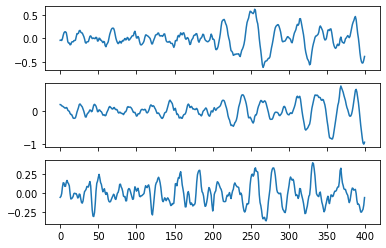

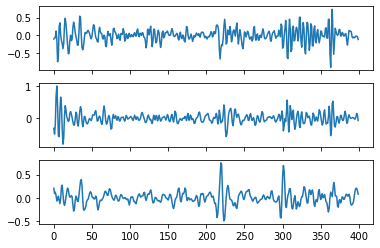

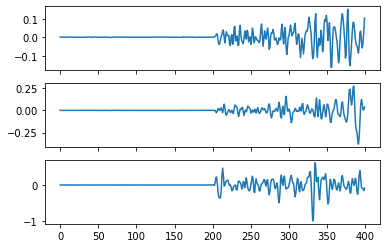

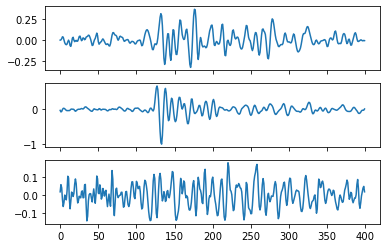

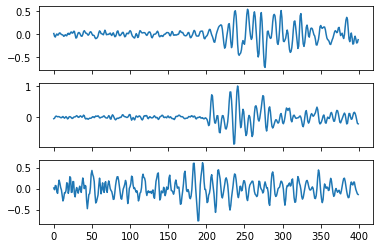

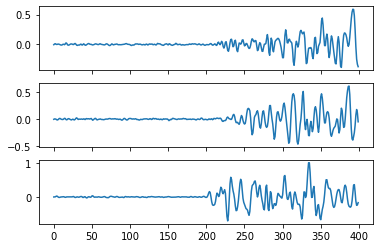

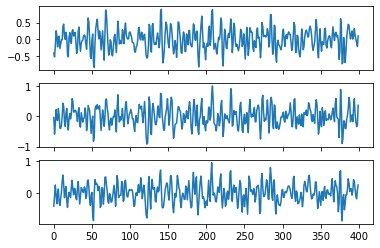

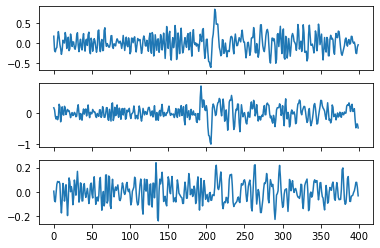

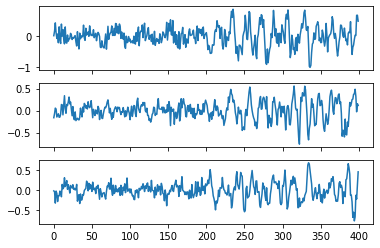

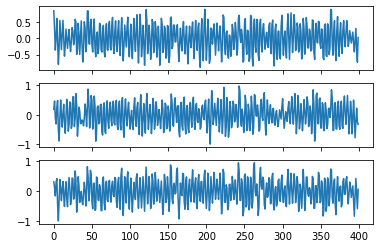

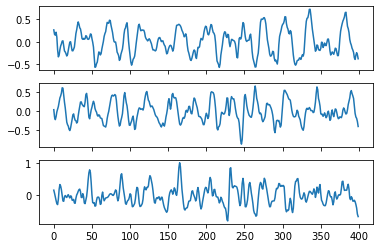

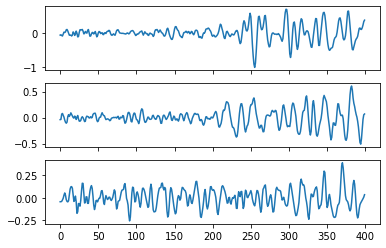

In [8]:
for idx in np.random.randint(0, X.shape[0], plots_num):
    
    plot_pick_from_sets(X, idx, Y, channels, label_aliases)

In [66]:
f_h5.close()